# Python Data Science

> Introduction to Machine Learning

Kuo, Yao-Jen from [DATAINPOINT](https://www.datainpoint.com/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler

## TL; DR

> In this lecture, we will talk about how to predict data with `sklearn` and `pyspark`.

## About Scikit-Learn

## What is Scikit-Learn?

> Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

Source: <https://scikit-learn.org/>

## Import sklearn with `import` command

In [2]:
import sklearn

## If Scikit-Learn is not installed, we will encounter a `ModuleNotFoundError`

```
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
ModuleNotFoundError: No module named 'sklearn'
```

## Use `pip install` at Terminal to install Scikit-Learn

```bash
pip install scikit-learn
```

## Check version and its installation file path

- `__version__` attribute
- `__file__` attribute

In [3]:
print(sklearn.__version__)
print(sklearn.__file__)

0.23.2
/opt/conda/lib/python3.8/site-packages/sklearn/__init__.py


## We usually import specific functionalities in Scikit-Learn, so instead of using `import sklearn`, we use `from sklearn import FUNCTIONALITY`

## Why Scikit-Learn?

> Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

## Scikit-Learn API principles

- **Consistency**
- **Inspection**
- Nonproliferation of classes
- Composition
- **Sensible defaults**

## Getting Started with Scikit-Learn

## What is Machine Learning?

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.
>
> [Tom Mitchel](http://www.cs.cmu.edu/~tom/)

## Traditional way to solve a problem with a computer program

![Imgur](https://i.imgur.com/3pojPXW.png?1)

## Given rules $w$ and data $X$, we are able to form a function $f$ for answers $y$

\begin{equation}
y = f(X;w) = Xw
\end{equation}

## The machine learning way to solve a problem with a computer program

![Imgur](https://i.imgur.com/YunyLd7.png)

## Given answers $y$ and data $X$, a computer program strives to generate rules $w$ that is able to minimize loss $J$

\begin{equation}
minimize \; J(w) \\
subject \; to \; \hat{y} = h(X; w) = Xw \\
where \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y}
\end{equation}

## The most common loss function $J$ adopted while predicting numerics

Minimize mean squared error.

\begin{align}
minimize \; J(w) =  \frac{1}{m} \sum_i^m (y_i - \hat{y_i})^2 \\
= \frac{1}{m} \sum_i^m (y_i - x_i w)^2
\end{align}

## The most common loss function $J$ adopted while predicting categoricals

Minimize number of errors.

\begin{align}
minimize \; J(w) = | y_i \neq \hat{y_i}| \\
= | y_i \neq \sigma(x_iw)|
\end{align}

## The most common loss function $J$ adopted while predicting probabilities

Minimize cross entropy function.

\begin{align}
minimize \; J(w) = \frac{1}{m} \sum_i^m -y log \big( \sigma(x_iw) \big) - (1-y) log \Big( \sigma \big( 1 - \sigma(x_iw) \big) \Big)
\end{align}

## Data representation in Scikit-Learn

- Feature matrix $X$ with a $(m, n)$ shape
- Target array $y$ with a $(m,)$ shape

In [4]:
def plot_X_y():
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.axis('equal')
    # Draw features matrix
    ax.vlines(range(6), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=0, xmax=5, lw=1)
    font_prop = dict(size=12, family='monospace')
    ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
    ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
    ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
            va='top', ha='right', **font_prop)
    # Draw labels vector
    ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
    ax.hlines(range(10), xmin=8, xmax=9, lw=1)
    ax.text(7, -1, "Target Vector ($y$)", size=14)
    ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
            va='top', ha='right', **font_prop)
    ax.set_ylim(10, -2)
    plt.show()

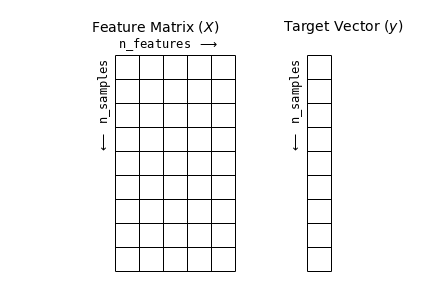

In [5]:
plot_X_y()

## How to extract feature matrix and target array from a DataFrame

In [6]:
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
print(type(player_stats))
print(player_stats.shape)

<class 'pandas.core.frame.DataFrame'>
(510, 50)


In [7]:
player_stats.head()

,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,...,ftm,fta,pFouls,points,gamesPlayed,gamesStarted,plusMinus,min,dd2,td3
0,Jaylen,Adams,"Adams, Jaylen",1629121,1610612757,10.0,True,G,6,0,...,7.0,9.0,45.0,108.0,34.0,1.0,-57.0,427.0,0.0,0.0
1,Steven,Adams,"Adams, Steven",203500,1610612760,12.0,True,C,6,11,...,876.0,1573.0,1384.0,5191.0,530.0,466.0,1619.0,14208.0,112.0,0.0
2,Bam,Adebayo,"Adebayo, Bam",1628389,1610612748,13.0,True,C-F,6,9,...,559.0,787.0,523.0,2352.0,223.0,119.0,234.0,5697.0,58.0,3.0
3,LaMarcus,Aldridge,"Aldridge, LaMarcus",200746,1610612759,12.0,True,C-F,6,11,...,3579.0,4414.0,2473.0,19599.0,1003.0,962.0,2799.0,34517.0,351.0,0.0
4,Kyle,Alexander,"Alexander, Kyle",1629734,1610612748,17.0,True,F-C,6,10,...,0.0,0.0,1.0,2.0,2.0,0.0,-3.0,13.0,0.0,0.0


In [8]:
X = player_stats[['apg', 'rpg']].values
y = player_stats['pos'].values
print(X.shape)
print(y.shape)

(510, 2)
(510,)


In [9]:
X = player_stats['heightMeters'].values.reshape(-1, 1)
y = player_stats['weightKilograms'].values
print(X.shape)
print(y.shape)

(510, 1)
(510,)


## The Scikit-Learn Estimators

## There are 2 sub-categories of estimator

1. Transformer: for preprocessing data.
2. Predictor: for generating rules $w$.

## Recap: the design principle of Scikit-Learn API

- **Consistency**
- **Inspection**
- Nonproliferation of classes
- Composition
- **Sensible defaults**

## We can literally see three of these when calling the Scikit-Learn API

- Consistency
- Inspection
- Sensible defaults

## The sensible defaults principle

Every estimator can be initiated with reasonable default.

In [10]:
# Two transformers
poly = PolynomialFeatures()
ss = StandardScaler()

In [11]:
# Two predictors
lr = LinearRegression()
ridge = Ridge()

## The consistency principle

- Every transformer has the method `fit_transform`.
- Every predictor has the methods `fit` and `predict`.

In [12]:
# Two transformers
X_poly = poly.fit_transform(X)
X_ss = ss.fit_transform(X)

In [13]:
# Two predictors
lr.fit(X, y)
ridge.fit(X, y)

Ridge()

## The inspection principle

Every estimator has the attribute to explore the rules of transformation and prediction.

In [14]:
# Two transformers
print(poly.get_params())
print(ss.mean_)
print(ss.scale_)

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
[1.9915098]
[0.08554711]


In [15]:
# Two predictors
print(lr.intercept_)
print(lr.coef_)
print(ridge.alpha)

-94.20402799150044
[96.91027034]
1.0


## Standard steps of calling Scikit-Learn estimators

1. Prepare feature matrix $X$ and target array $y$.
2. Split training and validation sets.
3. Initialize estimators.
4. Fit and inspect.
5. Evaluate performance on validation sets.

## Predicting a numeric: player weights

## Prepare feature matrix $X$ and target array $y$

In [16]:
pos_recoded = player_stats['pos'].map(lambda x: x[0])
pos_recoded_dummy = pd.get_dummies(pos_recoded)
X = np.concatenate((player_stats[['heightMeters', 'apg', 'rpg']].values, pos_recoded_dummy[['C', 'F', 'G']]), axis=1)
y = player_stats['weightKilograms'].values
print(X.shape)
print(y.shape)

(510, 6)
(510,)


## Split training and validation sets

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(408, 6)
(102, 6)
(408,)
(102,)


## Initialize estimators

In [18]:
lr = LinearRegression()
ridge = Ridge()

## Fit and inspect

In [19]:
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
print(lr.coef_)
print(ridge.coef_)

[47.43245585 -0.59196876  1.2242115   5.15766517 -0.42052367 -4.7371415 ]
[24.4242662  -0.89144254  1.44229199  6.55677125 -0.17696886 -6.37980238]


## Evaluate performance on validation sets

In [20]:
y_pred = lr.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))
y_pred = ridge.predict(X_valid)
print(mean_squared_error(y_valid, y_pred))

36.137565538277514
37.38438282915527


## Predicting a categorical: player positions

## Prepare feature matrix $X$ and target array $y$

In [21]:
pos_dict = {
    'G': 0,
    'F': 1,
    'C': 2
}
pos_recoded_int = pos_recoded.map(pos_dict)
X = player_stats[['heightMeters', 'apg', 'rpg']].values
y = pos_recoded_int.values
print(X.shape)
print(y.shape)

(510, 3)
(510,)


## Split training and validation sets

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(408, 3)
(102, 3)
(408,)
(102,)


## Initialize estimators

In [23]:
logreg = LogisticRegression()
svc = SVC(kernel='linear', probability=True)

## Fit and inspect

In [24]:
logreg.fit(X_train, y_train)
svc.fit(X_train, y_train)
print(logreg.coef_)
print(svc.coef_)

[[-2.72407735  1.63579497 -1.1325408 ]
 [ 0.76570272 -0.03457127  0.26456187]
 [ 1.95837464 -1.6012237   0.86797893]]
[[-3.57325897  1.25295652 -1.01015546]
 [-2.14362139  1.66365433 -0.72711106]
 [-2.10655033  0.56818467 -0.30341064]]


In [25]:
print(logreg.predict_proba(X_valid)[:5, :])
print(svc.predict_proba(X_valid)[:5, :])

[[4.98937130e-01 4.48870844e-01 5.21920254e-02]
 [2.56931057e-01 6.51166878e-01 9.19020654e-02]
 [6.45367895e-01 3.35668015e-01 1.89640897e-02]
 [9.94791205e-01 5.20517226e-03 3.62263535e-06]
 [4.62900334e-01 5.18337849e-01 1.87618171e-02]]
[[4.50418809e-01 4.69739376e-01 7.98418152e-02]
 [2.25088547e-01 6.85537442e-01 8.93740108e-02]
 [6.54690310e-01 3.16402582e-01 2.89071082e-02]
 [9.97432027e-01 2.56180491e-03 6.16820363e-06]
 [4.65956986e-01 5.13753796e-01 2.02892181e-02]]


## Evaluate performance on validation sets

In [26]:
y_pred = logreg.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
y_pred = svc.predict(X_valid)
print(accuracy_score(y_valid, y_pred))

0.7941176470588235
0.7745098039215687


## Extending to PySpark

## What is pyspark.ml?

> `pyspark.ml` is a group of DataFrame-based machine learning APIs to let users quickly assemble and configure practical machine learning pipelines.

Source: <https://spark.apache.org/>

## At the core of the `pyspark.ml` module is the Estimator class. That means we can smoothly leverage our Scikit-Learn knowledge

In [27]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

## Prepare a Spark DataFrame from a pandas DataFrame

In [28]:
player_stats['pos_recoded_int'] = pos_recoded_int
player_stats = pd.concat((player_stats, pos_recoded_dummy), axis=1)
print(type(player_stats))
player_stats.head()

<class 'pandas.core.frame.DataFrame'>


,firstName,lastName,temporaryDisplayName,personId,teamId,jersey,isActive,pos,heightFeet,heightInches,...,gamesPlayed,gamesStarted,plusMinus,min,dd2,td3,pos_recoded_int,C,F,G
0,Jaylen,Adams,"Adams, Jaylen",1629121,1610612757,10.0,True,G,6,0,...,34.0,1.0,-57.0,427.0,0.0,0.0,0,0,0,1
1,Steven,Adams,"Adams, Steven",203500,1610612760,12.0,True,C,6,11,...,530.0,466.0,1619.0,14208.0,112.0,0.0,2,1,0,0
2,Bam,Adebayo,"Adebayo, Bam",1628389,1610612748,13.0,True,C-F,6,9,...,223.0,119.0,234.0,5697.0,58.0,3.0,2,1,0,0
3,LaMarcus,Aldridge,"Aldridge, LaMarcus",200746,1610612759,12.0,True,C-F,6,11,...,1003.0,962.0,2799.0,34517.0,351.0,0.0,2,1,0,0
4,Kyle,Alexander,"Alexander, Kyle",1629734,1610612748,17.0,True,F-C,6,10,...,2.0,0.0,-3.0,13.0,0.0,0.0,1,0,1,0


## There we have our Spark DataFrame

In [29]:
player_stats_spark_df = spark.createDataFrame(player_stats[['weightKilograms', 'heightMeters', 'apg', 'rpg', 'pos_recoded_int', 'C', 'F', 'G']])
print(type(player_stats_spark_df))
player_stats_spark_df.show(5)

<class 'pyspark.sql.dataframe.DataFrame'>
+---------------+------------+---+---+---------------+---+---+---+
|weightKilograms|heightMeters|apg|rpg|pos_recoded_int|  C|  F|  G|
+---------------+------------+---+---+---------------+---+---+---+
|          102.1|        1.83|1.9|1.8|              0|  0|  0|  1|
|          120.2|        2.11|1.2|7.6|              2|  1|  0|  0|
|          115.7|        2.06|2.9|7.7|              2|  1|  0|  0|
|          113.4|        2.11|2.0|8.3|              2|  1|  0|  0|
|           98.0|        2.08|0.0|1.5|              1|  0|  1|  0|
+---------------+------------+---+---+---------------+---+---+---+
only showing top 5 rows



## Standard steps of calling pyspark.ml estimators

1. Prepare feature matrix $X$ and target array $y$ with `VectorAssembler`.
2. Split training and validation sets with `randomSplit`.
3. Initialize estimators.
4. Fit and inspect.
5. Evaluate performance on validation sets.

## Predicting a numeric: player weights

## Prepare feature matrix $X$ and target array $y$ with `VectorAssembler`

In [30]:
vectorAssembler = VectorAssembler(inputCols = ['heightMeters', 'apg', 'rpg', 'C', 'F', 'G'],
                                  outputCol = 'features')
va_df = vectorAssembler.transform(player_stats_spark_df)
va_df = va_df.select(['features', 'weightKilograms'])
va_df.show(5)

+--------------------+---------------+
|            features|weightKilograms|
+--------------------+---------------+
|[1.83,1.9,1.8,0.0...|          102.1|
|[2.11,1.2,7.6,1.0...|          120.2|
|[2.06,2.9,7.7,1.0...|          115.7|
|[2.11,2.0,8.3,1.0...|          113.4|
|[2.08,0.0,1.5,0.0...|           98.0|
+--------------------+---------------+
only showing top 5 rows



## Split training and validation sets with `randomSplit`

In [31]:
splits = va_df.randomSplit([0.8, 0.2])
train_df = splits[0]
valid_df = splits[1]

## Initialize estimators

In [32]:
from pyspark.ml.regression import LinearRegression # in order not to mixed up with the one in sklearn

lr = LinearRegression(featuresCol = 'features', labelCol='weightKilograms')

## Fit and inspect

In [33]:
lr_model = lr.fit(train_df)
print(lr_model.coefficients)

[52.334442993666705,-0.5100425590027675,0.9864130383814929,6.5158848879688,0.8729795005378003,-3.4611603177216494]


## Evaluate performance on validation sets

In [34]:
valid_result = lr_model.evaluate(valid_df)
print(valid_result.meanSquaredError)

32.598291819988724


## Predicting a categorical: player positions

## Prepare feature matrix $X$ and target array $y$ with `VectorAssembler`

In [35]:
vectorAssembler = VectorAssembler(inputCols = ['heightMeters', 'apg', 'rpg'],
                                  outputCol = 'features')
va_df = vectorAssembler.transform(player_stats_spark_df)
va_df = va_df.select(['features', 'pos_recoded_int'])
va_df.show(5)

+--------------+---------------+
|      features|pos_recoded_int|
+--------------+---------------+
|[1.83,1.9,1.8]|              0|
|[2.11,1.2,7.6]|              2|
|[2.06,2.9,7.7]|              2|
|[2.11,2.0,8.3]|              2|
|[2.08,0.0,1.5]|              1|
+--------------+---------------+
only showing top 5 rows



## Split training and validation sets with `randomSplit`

In [36]:
splits = va_df.randomSplit([0.8, 0.2])
train_df = splits[0]
valid_df = splits[1]

## Initialize estimators

In [37]:
from pyspark.ml.classification import LogisticRegression # in order not to mixed up with the one in sklearn

logreg = LogisticRegression(featuresCol = 'features', labelCol='pos_recoded_int')

## Fit and inspect

In [38]:
logreg_model = logreg.fit(train_df)
print(logreg_model.coefficientMatrix)

DenseMatrix([[-37.99524881,   1.43140142,  -1.239212  ],
             [  5.62556328,  -0.43689729,   0.34087919],
             [ 32.36968554,  -0.99450414,   0.89833281]])


## Evaluate performance on validation sets

In [39]:
valid_result = logreg_model.evaluate(valid_df)
print(valid_result.accuracy)

0.7766990291262136
